# MARKETING PROMOTION CAMPAIGN

Muh Amri Sidiq

# Introduction

Marketing promotion plays a crucial role in driving sales and customer engagement. However, identifying the right customers to target with promotional campaigns remains a challenging task. This project leverages **machine learning ensemble techniques**, specifically **Voting Ensemble** and **Stacking Ensemble**, to enhance the accuracy of promotional campaign predictions.  

By combining multiple machine learning models, the ensemble methods aim to reduce bias, variance, and improve overall predictive performance. The dataset used in this project consists of customer demographics, purchase history, and previous promotional responses.

## Import Library

In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import (
    GradientBoostingClassifier, 
    AdaBoostClassifier, 
    VotingClassifier, 
    RandomForestClassifier, 
    StackingClassifier)
from collections import Counter
from sklearn.linear_model import LogisticRegression

## Load Data

In [7]:
df = pd.read_csv("data.csv")

Check preview data use head

In [8]:
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


check struktur data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        64000 non-null  int64  
 1   history        64000 non-null  float64
 2   used_discount  64000 non-null  int64  
 3   used_bogo      64000 non-null  int64  
 4   zip_code       64000 non-null  object 
 5   is_referral    64000 non-null  int64  
 6   channel        64000 non-null  object 
 7   offer          64000 non-null  object 
 8   conversion     64000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


we have 9 column and 6400 row. and we can see non-null it means no missing values

In [6]:
print("summary duplicat:", df.duplicated().sum())

summary duplicat: 6603


Drop duplicated data

In [9]:
df_cleaned = df.drop_duplicates()

check again data

In [8]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57397 entries, 0 to 63999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        57397 non-null  int64  
 1   history        57397 non-null  float64
 2   used_discount  57397 non-null  int64  
 3   used_bogo      57397 non-null  int64  
 4   zip_code       57397 non-null  object 
 5   is_referral    57397 non-null  int64  
 6   channel        57397 non-null  object 
 7   offer          57397 non-null  object 
 8   conversion     57397 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.4+ MB


Explain for data every column is below:

 - `recency`            : months since last purchase
 - `history`            : $ value of the historical purchases
 - `used_discount`      : indicates if the customer used a discount before
 - `used_bogo`          : indicates if the customer used a buy one get one before
 - `zip_code`           : class of the zip code as Suburban/Urban/Rural
 - `is_referal`         : indicates if the customer was acquired from referral channel
 - `channel`            : channels that the customer using, Phone/Web/Multichannel
 - `offer`              : the offers sent to the customers, Discount/But One Get One/No Offer
 - `conversion`         : customer conversion(buy or not)

## Exploratory Data Analysis

EDA is a critical step in understanding the dataset. Using Python libraries like Pandas, Seaborn, and Matplotlib, we analyze distributions, identify patterns, and detect anomalies. Visualizations such as histograms, box plots, and heatmaps reveal relationships between features and the target variable, setting the stage for effective feature engineering and model building

In [10]:
df["conversion"].value_counts()

conversion
0    54606
1     9394
Name: count, dtype: int64

Target our data is not balance

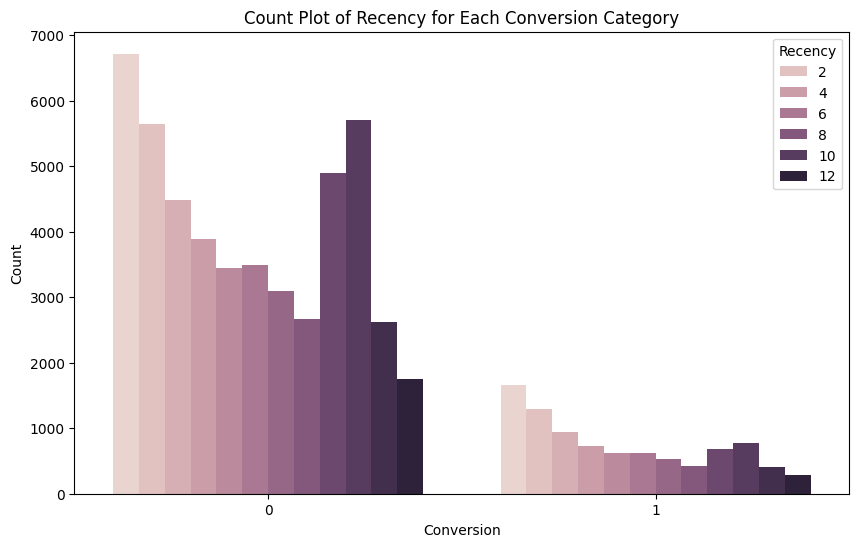

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='conversion', hue='recency', data=df_cleaned)
plt.title('Count Plot of Recency for Each Conversion Category')
plt.xlabel('Conversion')
plt.ylabel('Count')
plt.legend(title='Recency')
plt.show()

Insight: from plot above we have pattern in `recency` 1 and 10 high with `conversion` 0, same as too `conversion` 1 

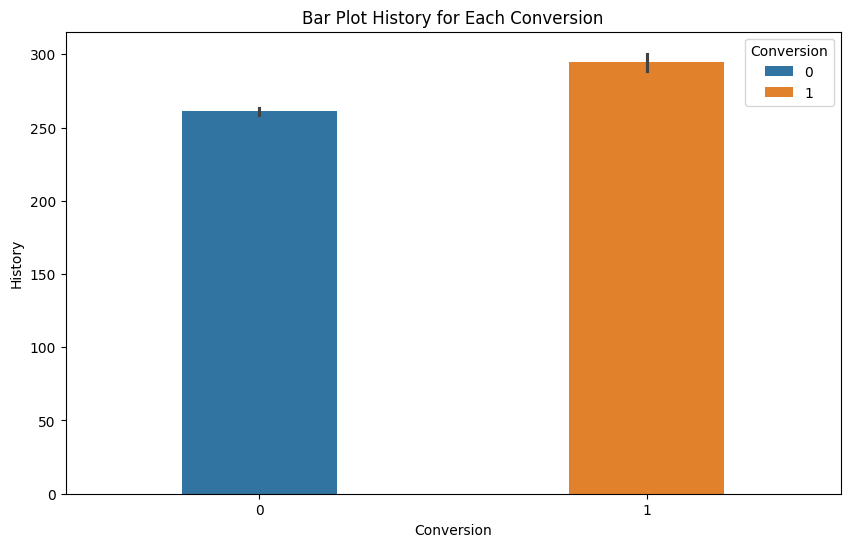

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_cleaned['conversion'].astype(str), y=df_cleaned['history'], hue=df_cleaned['conversion'], width=0.4)
plt.title('Bar Plot History for Each Conversion')
plt.xlabel('Conversion')
plt.ylabel('History')
plt.legend(title="Conversion")
plt.show()

Insight: `conversion` with 1 have higher than other

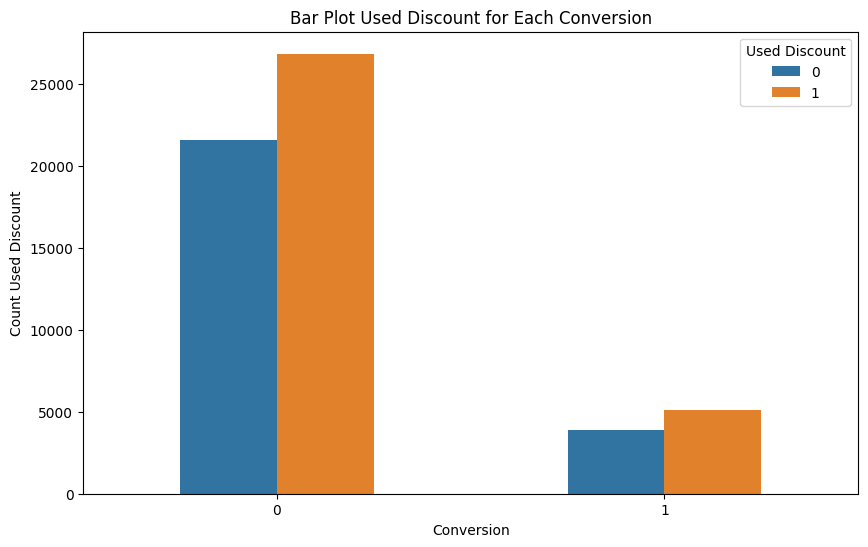

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='conversion', hue='used_discount', data=df_cleaned, width=0.5)
plt.title('Bar Plot Used Discount for Each Conversion')
plt.xlabel('Conversion')
plt.ylabel('Count Used Discount')
plt.legend(title="Used Discount")
plt.show()

Insight: count `used_discount` with 1 and 0 have higher than other

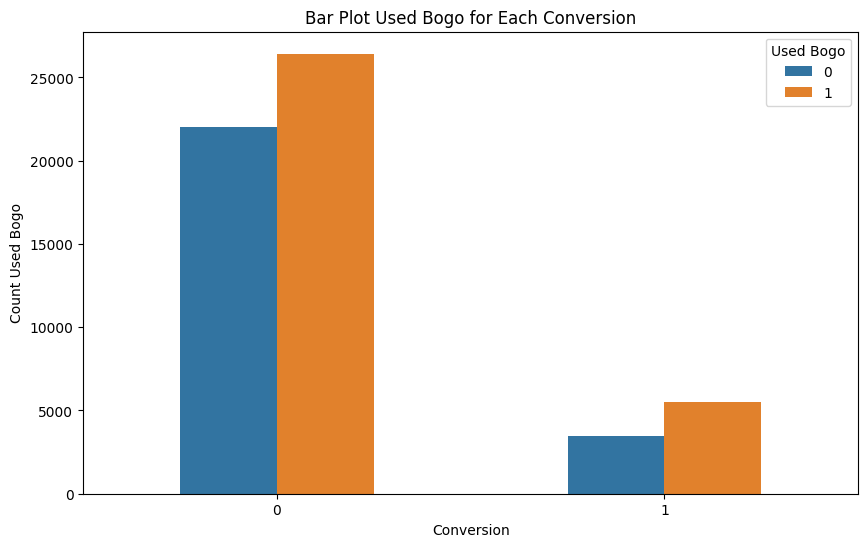

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='conversion', hue='used_bogo', data=df_cleaned, width=0.5)
plt.title('Bar Plot Used Bogo for Each Conversion')
plt.xlabel('Conversion')
plt.ylabel('Count Used Bogo')
plt.legend(title="Used Bogo")
plt.show()

count `used_bogo` with 1 and 0 have higher than other

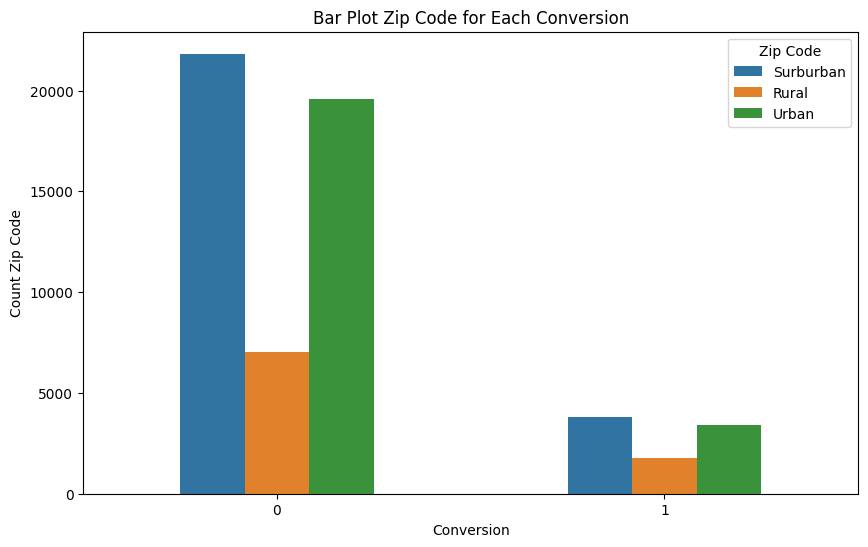

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='conversion', hue='zip_code', data=df_cleaned, width=0.5)
plt.title('Bar Plot Zip Code for Each Conversion')
plt.xlabel('Conversion')
plt.ylabel('Count Zip Code')
plt.legend(title="Zip Code")
plt.show()

Insiht: count `zip_code` with `conversion 0 have highre than other

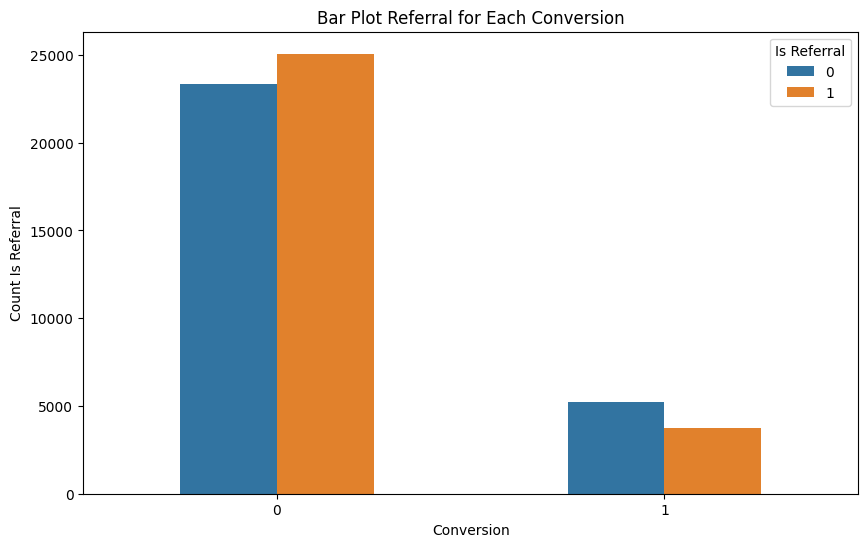

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='conversion', hue='is_referral', data=df_cleaned, width=0.5)
plt.title('Bar Plot Referral for Each Conversion')
plt.xlabel('Conversion')
plt.ylabel('Count Is Referral')
plt.legend(title="Is Referral")
plt.show()

Insight: count `is_referral` 0 and 1 with `conversion` 0 have higher

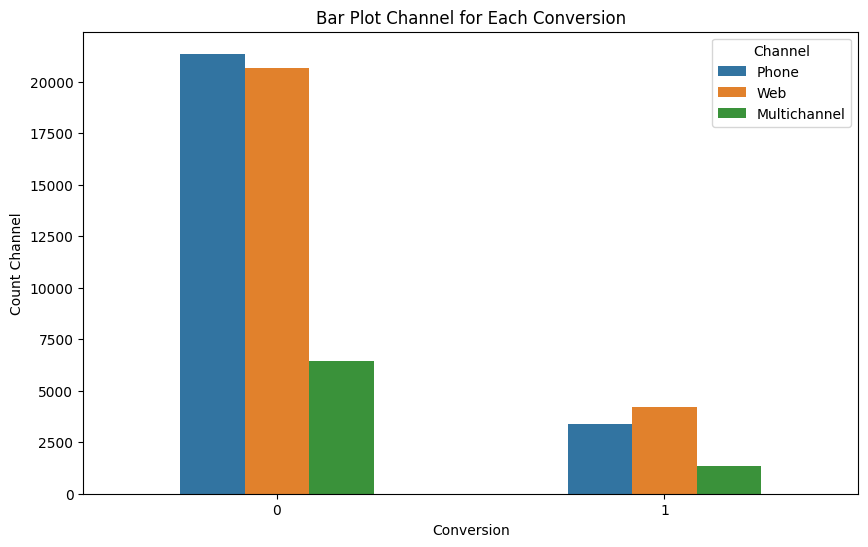

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='conversion', hue='channel', data=df_cleaned, width=0.5)
plt.title('Bar Plot Channel for Each Conversion')
plt.xlabel('Conversion')
plt.ylabel('Count Channel')
plt.legend(title="Channel")
plt.show()

Insight: Count `channel`with `conversion` 0 have higher than other

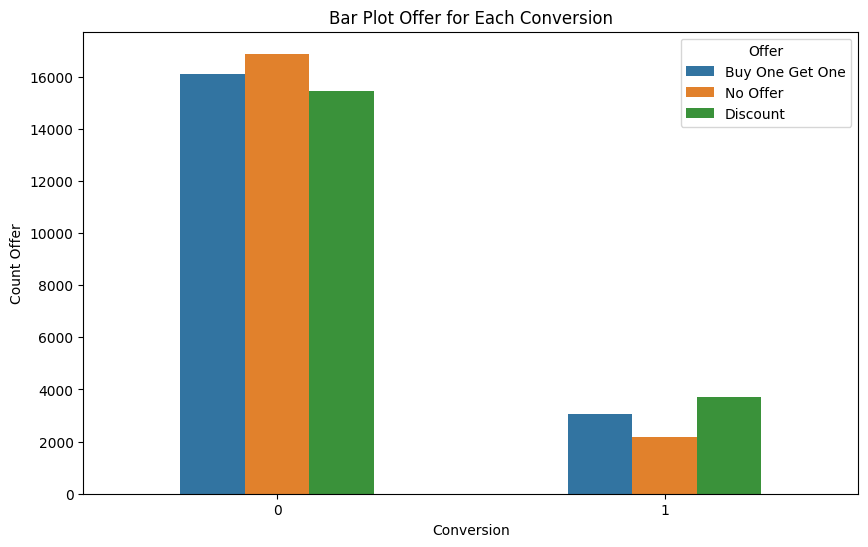

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='conversion', hue='offer', data=df_cleaned, width=0.5)
plt.title('Bar Plot Offer for Each Conversion')
plt.xlabel('Conversion')
plt.ylabel('Count Offer')
plt.legend(title="Offer")
plt.show()

Insight: count `offer` with `conversion` 0 have higher count than other

## Label Encoder

Change type data object to label encoder, because model only use if type data numeric

In [11]:
encoder = LabelEncoder()
df_cleaned['zip_code'] = encoder.fit_transform(df_cleaned['zip_code'])
df_cleaned['channel'] = encoder.fit_transform(df_cleaned['channel'])
df_cleaned['offer'] = encoder.fit_transform(df_cleaned['offer'])

C:\Users\amris\AppData\Local\Temp\ipykernel_10372\2734138526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['zip_code'] = encoder.fit_transform(df_cleaned['zip_code'])
C:\Users\amris\AppData\Local\Temp\ipykernel_10372\2734138526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['channel'] = encoder.fit_transform(df_cleaned['channel'])
C:\Users\amris\AppData\Local\Temp\ipykernel_10372\2734138526.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

## Train-Test Split

Separate target and feature

In [12]:
x = df_cleaned.drop('conversion', axis=1)
y = df_cleaned['conversion']

## K-Fold Cross Validation

K-Fold is used to divide the dataset into folds.

In [13]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
for train_idx, val_idx in kf.split(x):
    x_train, x_val = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

## Modeling

### Voting Ensemble

Ensemble voting is one of the methods in machine learning that is used to improve the performance and accuracy of the model by combining the prediction results of several different models or algorithms.

In [ ]:
# Hyperparameter Tuning for GradientBoostingClassifier
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_params, scoring='accuracy', cv=3)
gb_grid.fit(x_train, y_train)
gb_best = gb_grid.best_estimator_

# Hyperparameter Tuning for AdaBoostClassifier
ada_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1.0]
}
ada_grid = GridSearchCV(AdaBoostClassifier(), ada_params, scoring='accuracy', cv=3)
ada_grid.fit(x_train, y_train)
ada_best = ada_grid.best_estimator_

# Hyperparameter Tuning for RandomForestClassifier
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, scoring='accuracy', cv=3)
rf_grid.fit(x_train, y_train)
rf_best = rf_grid.best_estimator_

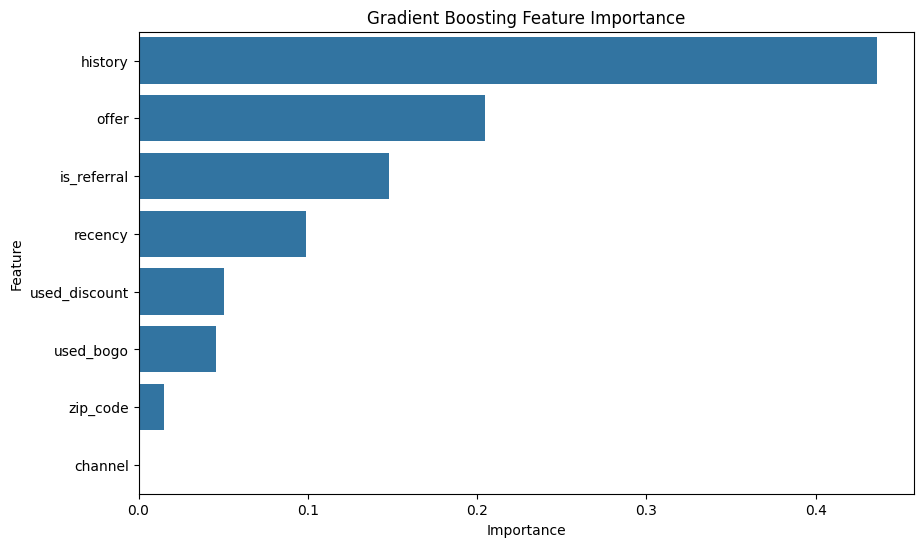

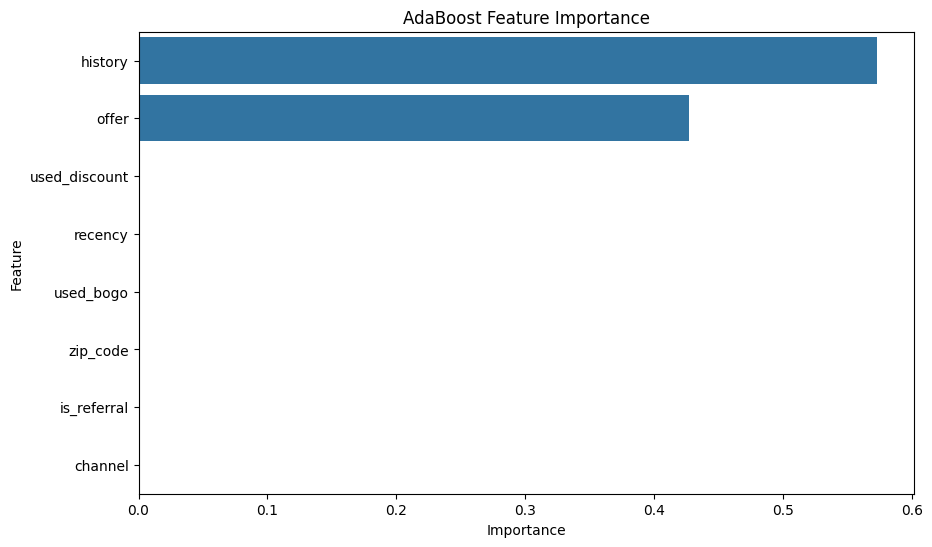

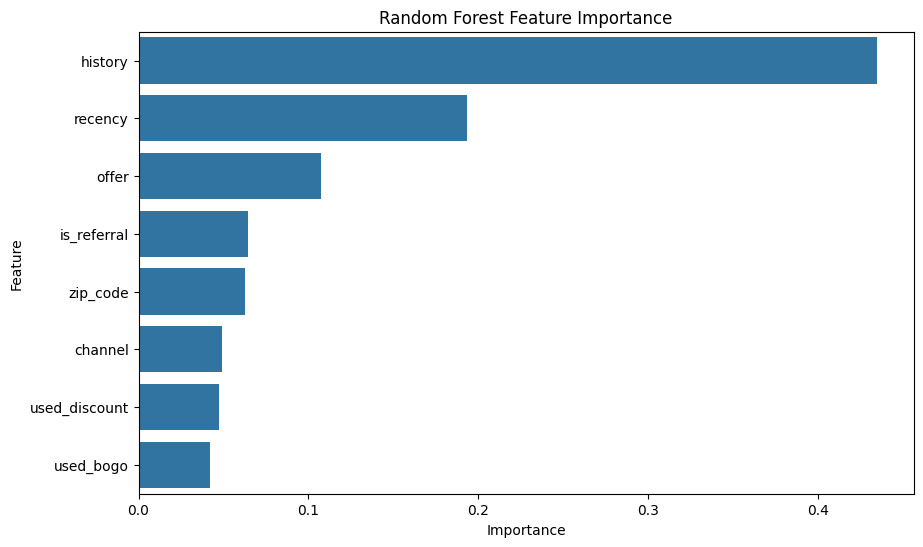

In [16]:
# Gradient Boosting Regressor
gb_feature_importances = gb_best.feature_importances_

# AdaBoost Regressor
ada_feature_importances = ada_best.feature_importances_

# Random Forest Regressor
rf_feature_importances = rf_best.feature_importances_

# Create DataFrames for visualization
gb_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': gb_feature_importances})
ada_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': ada_feature_importances})
rf_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf_feature_importances})

# Sort by importance
gb_importance_df = gb_importance_df.sort_values('Importance', ascending=False)
ada_importance_df = ada_importance_df.sort_values('Importance', ascending=False)
rf_importance_df = rf_importance_df.sort_values('Importance', ascending=False)


# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_importance_df)
plt.title('Gradient Boosting Feature Importance')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=ada_importance_df)
plt.title('AdaBoost Feature Importance')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

Insight: from 3 model above feature importance same is `history` and `offer`, 3 week feature importance is `channel`, `used_bogo` and `zip_code`

In [17]:
voting_classifier = VotingClassifier(estimators=[
    ('gb', gb_best),
    ('ada', ada_best),
    ('rf', rf_best)], voting='hard') 

voting_classifier.fit(x_train, y_train)

y_pred_v = voting_classifier.predict(x_val)

accuracy = accuracy_score(y_val, y_pred_v)
print(f'Accuracy: {accuracy:.2%}')

print("\nClassification Report:")
print(classification_report(y_val, y_pred_v))

Accuracy: 83.71%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      4804
           1       0.00      0.00      0.00       935

    accuracy                           0.84      5739
   macro avg       0.42      0.50      0.46      5739
weighted avg       0.70      0.84      0.76      5739



c:\Users\amris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\amris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Insight: Accuracy model 83.71%

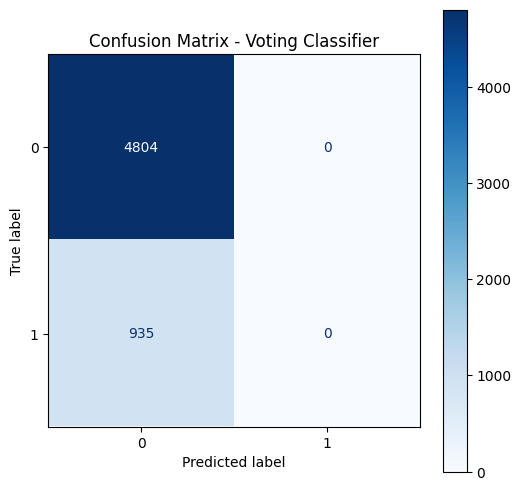

In [19]:
cm = confusion_matrix(y_val, y_pred_v)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax)

plt.title("Confusion Matrix - Voting Classifier")
plt.show()

Insight: From plot above True and predict 0 same is 4804 and 0 true and predict 1, true and predict 1 is 935 but 0 predic 1.

### Stacking Ensemble

Stacking Ensemble: Combining Multiple Strong Learners for Improved Classification Performance

In [20]:
base_learners = [
    ('gb', gb_best),
    ('ada', ada_best),
    ('rf', rf_best)
]

logreg_params = {'final_estimator__C': [0.1, 1.0, 10]}  
stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

stacking_grid = GridSearchCV(stacking_classifier, logreg_params, scoring='accuracy', cv=3)
stacking_grid.fit(x_train, y_train)

# Best model
stacking_best = stacking_grid.best_estimator_

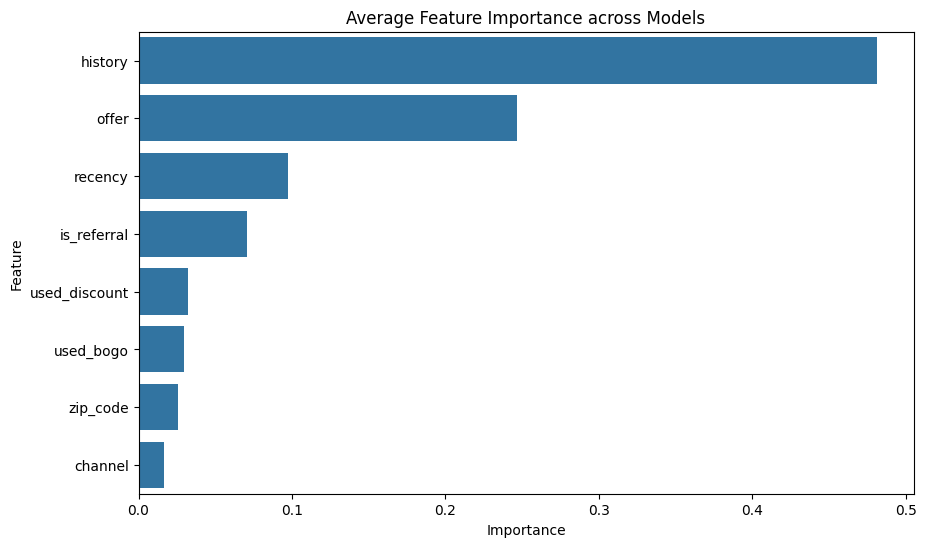

In [21]:
# Access feature importances from the trained models
gb_feature_importances = gb_best.feature_importances_
ada_feature_importances = ada_best.feature_importances_
rf_feature_importances = rf_best.feature_importances_

# Create DataFrames for visualization, including a 'Model' column
gb_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': gb_feature_importances, 'Model': 'Gradient Boosting'})
ada_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': ada_feature_importances, 'Model': 'AdaBoost'})
rf_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf_feature_importances, 'Model': 'Random Forest'})

# Combine DataFrames
importance_df = pd.concat([gb_importance_df, ada_importance_df, rf_importance_df])

# Calculate average importance across models
average_importance = importance_df.groupby('Feature')['Importance'].mean().reset_index()

# Sort by average importance
average_importance = average_importance.sort_values('Importance', ascending=False)


# Plot average feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=average_importance)
plt.title('Average Feature Importance across Models')
plt.show()

Insight: feature important highest is `history`, and feature importance lowest is `channel`

In [22]:
y_pred_sh = stacking_best.predict(x_val)
accuracy1 = accuracy_score(y_val, y_pred_sh)

print(f'Accuracy: {accuracy1:.2%}')

print("\nClassification Report:")
print(classification_report(y_val, y_pred_sh))

Accuracy: 83.46%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      4804
           1       0.35      0.02      0.03       935

    accuracy                           0.83      5739
   macro avg       0.59      0.51      0.47      5739
weighted avg       0.76      0.83      0.77      5739



Insight: Accuracy model is 83.4%

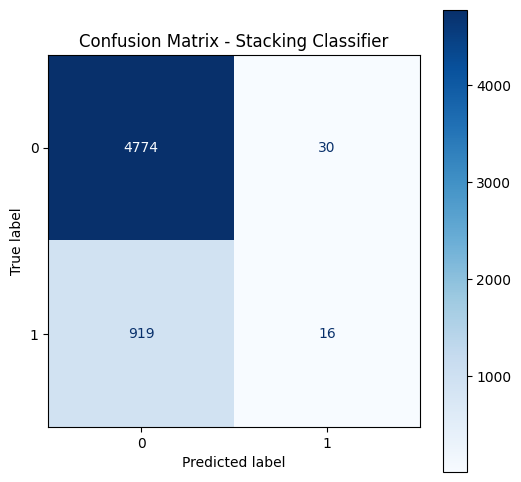

In [23]:
cm = confusion_matrix(y_val, y_pred_sh)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap='Blues', ax=ax)

plt.title("Confusion Matrix - Stacking Classifier")
plt.show()

Insight: True label 0 with predict label 0 is 4774 and true label 0 with predict 1 is 30, True label 1 with predict 1 is 16 and True label 1 with predict 0 is 919

## Conclusion



high feature importance is`history`, `offer` and `recency`. For machine learning voting ensemble have highest accuray 83.71%

## Reference



1. https://www.kaggle.com/datasets/davinwijaya/customer-retention

2. https://www.analyticsvidhya.com/

3. https://xbe.at/